In [1]:
from mlhelper import MLHelper, pd
from sklearn.datasets import load_breast_cancer

dataset = load_breast_cancer()
labels_dict = {
    0: {
        'name': 'malignant',
        'color': 'r',
        'marker': '^'
    },
    1: {
        'name': 'benign',
        'color': 'b',
        'marker': 'o'
    }
}
helper = MLHelper('Breast Cancer', labels_dict)
cancer_df = pd.DataFrame(
    data=dataset.data
    , columns=dataset.feature_names
)
cancer_df['target'] = dataset.target

[I 2025-04-27 11:22:12,721] A new study created in memory with name: no-name-50bcd48e-fe0c-4cf5-ad45-6b180c248e95


[I 2025-04-27 11:22:12,751] Trial 0 finished with value: 0.6281645569620252 and parameters: {'C': 0.0021686324204699212, 'kernel': 'linear', 'max_iter': 9644}. Best is trial 0 with value: 0.6281645569620252.
[I 2025-04-27 11:22:12,769] Trial 1 finished with value: 0.9547468354430378 and parameters: {'C': 19.39705538252109, 'kernel': 'sigmoid', 'gamma': 0.1405883932048975, 'max_iter': 8654}. Best is trial 1 with value: 0.9547468354430378.
[I 2025-04-27 11:22:12,788] Trial 2 finished with value: 0.9749367088607596 and parameters: {'C': 0.36806929984964004, 'kernel': 'linear', 'max_iter': 454}. Best is trial 2 with value: 0.9749367088607596.
[I 2025-04-27 11:22:12,812] Trial 3 finished with value: 0.9271835443037976 and parameters: {'C': 0.024715265544375645, 'kernel': 'linear', 'max_iter': 2914}. Best is trial 2 with value: 0.9749367088607596.
[I 2025-04-27 11:22:12,829] Trial 4 finished with value: 0.9748101265822784 and parameters: {'C': 0.8856789796392815, 'kernel': 'linear', 'max_ite

Best trial:
Accuracy: 0.9849683544303798
Best hyperparameters:  {'C': 1.0817142539526878, 'kernel': 'linear', 'max_iter': 4071}


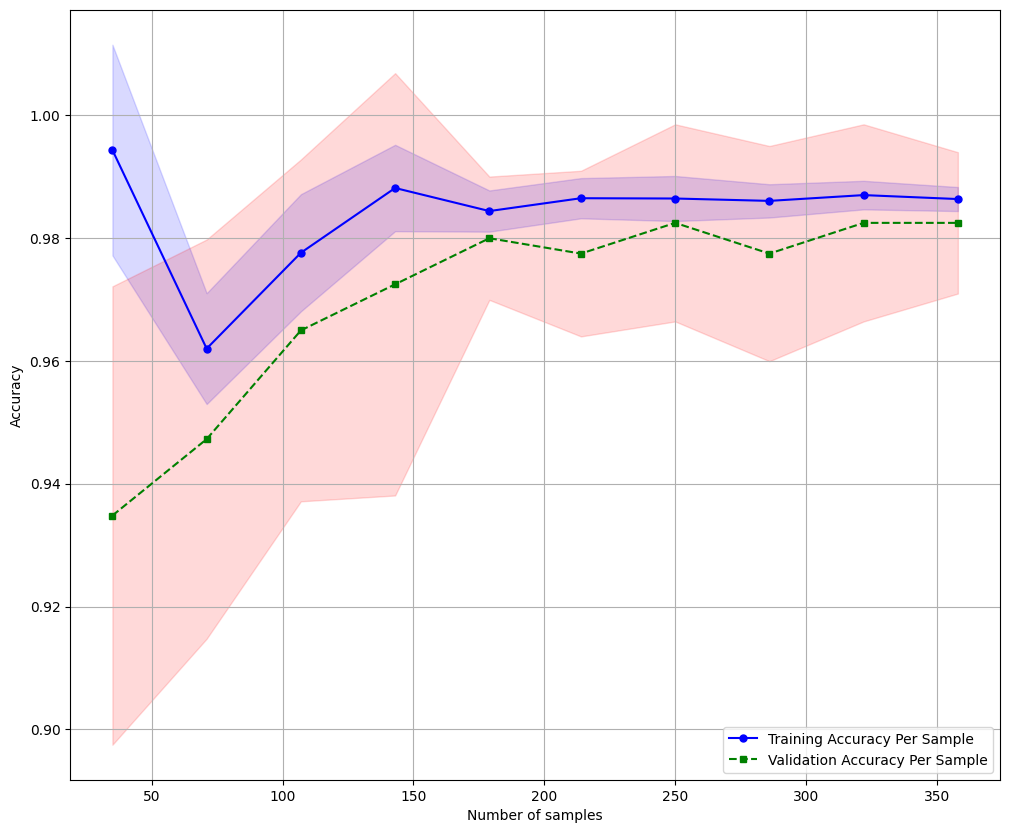

Confusion Matrix
[[ 54  10]
 [  0 107]]
Accuracy: 0.9415, Precision: 0.9145, Recall: 1.0000, F1: 0.9554, AUC: 0.9904


In [2]:
outlier_params = {'eps': 0.5, 'min_samples': 8, 'n_jobs': -1}
X_train, X_test, y_train, y_test = helper.get_split_data(cancer_df, test_size=0.3, shuffle=True, stratify=True)
X_train_transformed = helper.get_transformed_features(X_train)
X_test_transformed = helper.get_transformed_features(X_test)
X_train_scaled, X_test_scaled = helper.get_scaled_data(X_train_transformed, X_test_transformed, y_train, y_test, 'mm')

helper.train_and_evaluate_model('svc', X_train_scaled, X_test_scaled, y_train, y_test)